In [287]:
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport
from sklearn.model_selection import train_test_split

In [288]:
#Base de Treino
treino = pd.read_csv('train.csv')
display(treino)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [289]:
#Gerar um relatório
#profile = ProfileReport(treino, title="titanic_treino")
#profile.to_file("titanic_treino.html")

In [290]:
treino.info()
treino.dtypes.value_counts()
treino.isnull().sum().sort_values(ascending=False).head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
dtype: int64

In [291]:
#Base de Teste
teste = pd.read_csv('test.csv')
teste.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [292]:
teste.info()
teste.dtypes.value_counts()
teste.isnull().sum().sort_values(ascending=False).head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
dtype: int64

In [293]:
treino.nunique().sort_values(ascending=False)

PassengerId    891
Name           891
Ticket         681
Fare           248
Cabin          147
Age             88
SibSp            7
Parch            7
Pclass           3
Embarked         3
Survived         2
Sex              2
dtype: int64

In [294]:
treino = treino.drop(['Name', 'Ticket', 'Cabin'], axis=1)
teste = teste.drop(['Name', 'Ticket', 'Cabin'], axis=1)

In [295]:
treino.loc[treino.Age.isnull(), 'Age'] = treino.Age.mean()
teste.loc[teste.Age.isnull(), 'Age'] = teste.Age.mean()

In [296]:
treino.loc[treino.Embarked.isnull(), 'Embarked'] = treino.Embarked.mode()[0]

In [297]:
teste.loc[teste.Fare.isnull(), 'Fare'] = teste.Fare.mean()

In [298]:
treino.columns[treino.dtypes == 'object']

Index(['Sex', 'Embarked'], dtype='object')

In [299]:
treino.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [300]:
treino.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

Para tratar a coluna Sex: usar um Male_check, sendo 1 para masculino e 0 para feminino -> Valor binário

In [301]:
treino['MaleCheck'] = treino.Sex.apply(lambda x: 1 if x == 'male' else 0)

In [302]:
treino[['Sex', 'MaleCheck']].value_counts()

Sex     MaleCheck
male    1            577
female  0            314
dtype: int64

In [303]:
teste['MaleCheck'] = teste.Sex.apply(lambda x: 1 if x == 'male' else 0)
teste[['Sex', 'MaleCheck']].value_counts()

Sex     MaleCheck
male    1            266
female  0            152
dtype: int64

#OneHotEncoder: cria uma nova coluna para cada um dos rótulos da coluna original

In [304]:
from sklearn.preprocessing import OneHotEncoder

In [305]:
ohe = OneHotEncoder(handle_unknown='ignore', dtype='int32')
ohe = ohe.fit(treino[['Embarked']])
ohe.transform(treino[['Embarked']]).toarray()

array([[0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       ...,
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0]])

In [306]:
ohe_df = pd.DataFrame(ohe.transform(treino[['Embarked']]).toarray(), columns=ohe.get_feature_names_out())
ohe_df.head(3)

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1


In [307]:
treino = pd.concat([treino, ohe_df], axis=1)
treino[['Embarked', 'Embarked_C', 'Embarked_Q', 'Embarked_S']].value_counts()

Embarked  Embarked_C  Embarked_Q  Embarked_S
S         0           0           1             646
C         1           0           0             168
Q         0           1           0              77
dtype: int64

In [308]:
ohe_df = pd.DataFrame(ohe.transform(teste[['Embarked']]).toarray(), columns=ohe.get_feature_names_out())
teste = pd.concat([teste, ohe_df], axis=1)
teste[['Embarked', 'Embarked_C', 'Embarked_Q', 'Embarked_S']].value_counts()

Embarked  Embarked_C  Embarked_Q  Embarked_S
S         0           0           1             270
C         1           0           0             102
Q         0           1           0              46
dtype: int64

In [309]:
treino = treino.drop(['Sex', 'Embarked'], axis=1)
teste = teste.drop(['Sex', 'Embarked'], axis=1)

In [310]:
treino.head(3)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,MaleCheck,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,0,1



Treinar o modelo

In [311]:
X = treino.drop(['PassengerId', 'Survived'], axis=1) #retira a que eu quero prever
y = treino.Survived #quem eu quero prever

In [312]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42)

In [313]:
from sklearn import tree
c_ac = tree.DecisionTreeClassifier()
c_ac = c_ac.fit(X_train,y_train)
y_pred_ac = c_ac.predict(X_val)

In [314]:
from sklearn.neighbors import KNeighborsClassifier
c_knn = KNeighborsClassifier(n_neighbors=3)
c_knn = c_knn.fit(X_train, y_train)
y_pred_knn = c_knn.predict(X_val)

c:\Users\Emily\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [315]:
from sklearn.linear_model import LogisticRegression
c_rl = LogisticRegression()
c_rl = c_rl.fit(X_train, y_train)
y_pred_rl = c_rl.predict(X_val)

c:\Users\Emily\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [316]:
from sklearn.metrics import accuracy_score

In [317]:
as_ac = accuracy_score(y_val, y_pred_ac)
as_ac

0.7491525423728813

In [318]:
as_knn = accuracy_score(y_val, y_pred_knn)
as_knn

0.7152542372881356

In [319]:
as_rl = accuracy_score(y_val, y_pred_rl)
as_rl

0.8101694915254237

In [320]:
as_df = pd.DataFrame({
    'modelos' : ['arvore', 'knn', 'reg. log.'],
    'inicial' : [as_ac, as_knn, as_rl]
})

as_df

,modelos,inicial
0,arvore,0.749153
1,knn,0.715254
2,reg. log.,0.810169


In [321]:
from sklearn.metrics import confusion_matrix

In [322]:
confusion_matrix(y_val, y_pred_ac)

array([[138,  37],
       [ 37,  83]], dtype=int64)

In [323]:
confusion_matrix(y_val, y_pred_knn)

array([[147,  28],
       [ 56,  64]], dtype=int64)

In [324]:
confusion_matrix(y_val, y_pred_rl)

array([[151,  24],
       [ 32,  88]], dtype=int64)

Previsão com a base de teste

In [325]:
#X_teste = teste.drop(['PassengerId'], axis=1)
#y_pred = c_rl.predict(X_teste)
#teste['Survived'] = y_pred
#base_envio = teste[['PassengerId', 'Survived']]
#base_envio.to_csv('Resultados02.csv', index=False)

> > > Engenharia de Recursos - Analisando a escala dos dados

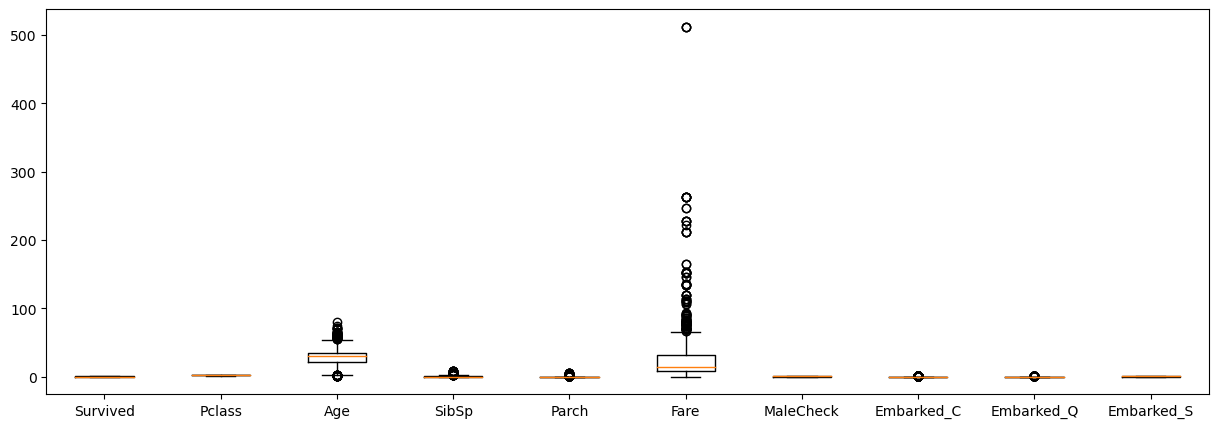

In [326]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,5))

ax.boxplot(treino.iloc[:,1:11])
ax.set_xticks(range(1,treino.iloc[:,1:11].shape[1]+1), treino.iloc[:,1:11].columns)

plt.show()

Tratar as váriaveis com sklearn

In [327]:
from sklearn.preprocessing import RobustScaler

transformer = RobustScaler().fit(treino[['Age', 'Fare']])
treino[['Age', 'Fare']] = transformer.transform(treino[['Age', 'Fare']])

In [328]:
transformer = RobustScaler().fit(teste[['Age', 'Fare']])
teste[['Age', 'Fare']] = transformer.transform(teste[['Age', 'Fare']])

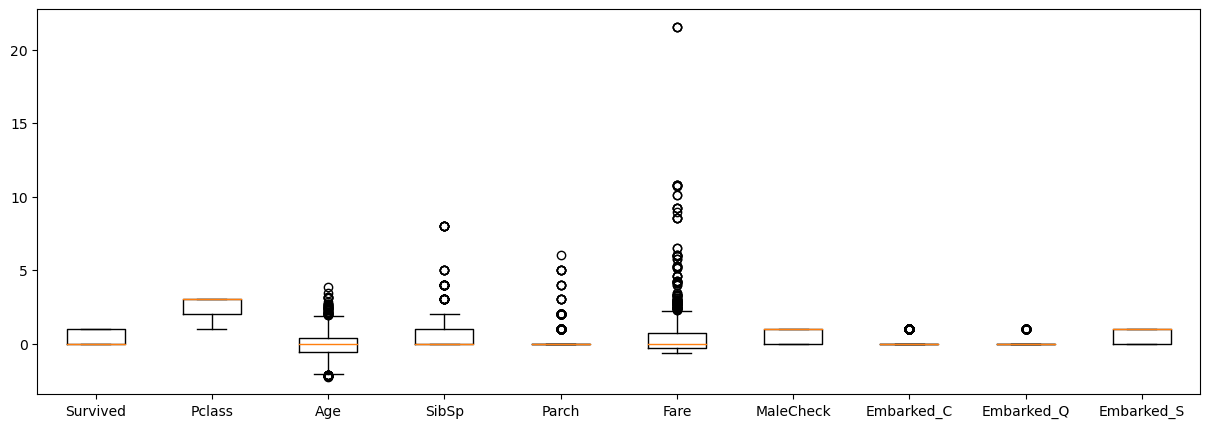

In [329]:
fig, ax = plt.subplots(figsize=(15,5))

ax.boxplot(treino.iloc[:,1:11])
ax.set_xticks(range(1,treino.iloc[:,1:11].shape[1]+1), treino.iloc[:,1:11].columns)

plt.show()

In [330]:
X = treino.drop(['PassengerId', 'Survived'], axis=1) #retira a que eu quero prever
y = treino.Survived #quem eu quero prever

In [331]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42)

In [332]:
c_ac = tree.DecisionTreeClassifier()
c_ac = c_ac.fit(X_train,y_train)
y_pred_ac = c_ac.predict(X_val)

In [333]:
c_knn = KNeighborsClassifier(n_neighbors=3)
c_knn = c_knn.fit(X_train, y_train)
y_pred_knn = c_knn.predict(X_val)

c:\Users\Emily\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [334]:
from sklearn.linear_model import LogisticRegression
c_rl = LogisticRegression()
c_rl = c_rl.fit(X_train, y_train)
y_pred_rl = c_rl.predict(X_val)

In [335]:
as_ac = accuracy_score(y_val, y_pred_ac)
as_ac
as_knn = accuracy_score(y_val, y_pred_knn)
as_knn
as_rl = accuracy_score(y_val, y_pred_rl)
as_rl

0.8169491525423729

In [336]:
as_df['escala'] = [as_ac, as_knn, as_rl]

as_df

,modelos,inicial,escala
0,arvore,0.749153,0.766102
1,knn,0.715254,0.800000
2,reg. log.,0.810169,0.816949


https://www.youtube.com/watch?v=SuggbASmZZ8